###  Q.1 Predict delivery time using sorting time 
####  Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

### Required libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error 

### Loading datasets

In [38]:
delivery_data=pd.read_csv('Assignments data sets/delivery_time.csv')
delivery_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Data preprocessing

In [39]:
delivery_data.shape

(21, 2)

In [40]:
delivery_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [41]:
delivery_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

#### Corelation Analysis

Text(0, 0.5, 'Delivery Time')

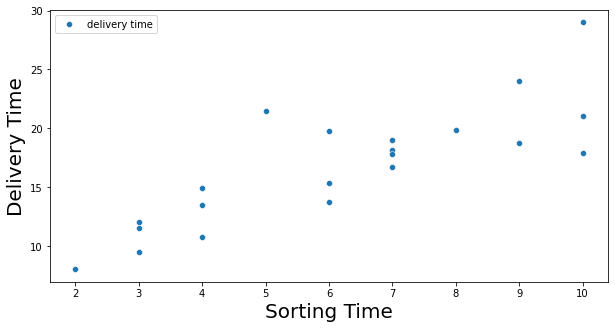

In [43]:
filterwarnings(action='ignore')
plt.figure(figsize=(10,5))
sns.scatterplot('Sorting Time','Delivery Time',data=delivery_data,label='delivery time')
plt.xlabel('Sorting Time',fontsize=20)
plt.ylabel('Delivery Time',fontsize=20)

In [44]:
delivery_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


### Model training 

In [45]:
x=delivery_data.drop(columns=['Delivery Time'])
y=delivery_data['Delivery Time']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)
k=['x_train','x_test','y_train','y_test']
j=0
for i in [x_train,x_test,y_train,y_test]:
  print(f'shape of {k[j]} is ', i.shape)
  j+=1

shape of x_train is  (14, 1)
shape of x_test is  (7, 1)
shape of y_train is  (14,)
shape of y_test is  (7,)


In [47]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [48]:
model.coef_,model.intercept_

(array([1.28421384]), 8.96332434860737)

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

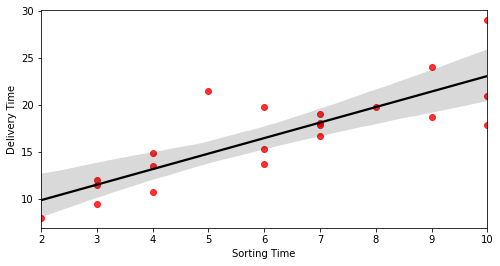

In [49]:
plt.figure(figsize=(8,4))
sns.regplot(x=delivery_data['Sorting Time'],y=delivery_data['Delivery Time'],line_kws={'color':'black',},scatter_kws={'color':'red'},)

#### Training score

In [50]:
model.score(x_train,y_train)   

0.5560186697160066

In [54]:
# It has bias

### Model testing

In [55]:
y_pred=model.predict(x_test)
y_pred

array([16.66860737, 17.9528212 , 11.53175202, 21.80546271, 14.10017969,
       17.9528212 , 12.81596586])

#### Model Evaluation

In [56]:
model.score(x_test,y_test)   #same as R-squared error

0.714564149595335

In [57]:
mean_squared_error(y_pred,y_test)      # Average squared error of each predicted observation

10.925721249482352

In [58]:
np.sqrt(mean_squared_error(y_pred,y_test))      # Average error of each predicted observation

3.3054078794427704

In [60]:
mean_absolute_error(y_pred,y_test)

2.4223835194455154

In [61]:
r2_score(y_test,y_pred)          # 71 % of total variation in delivery time can be explain when sorting time is taken in account

0.714564149595335

###  Model retraining  by feature scaling 

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

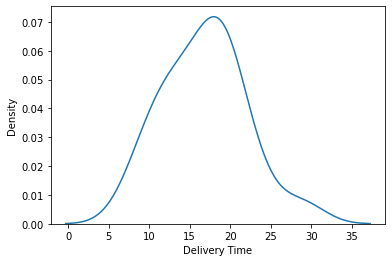

In [62]:
sns.distplot(delivery_data['Delivery Time'],hist=False)

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

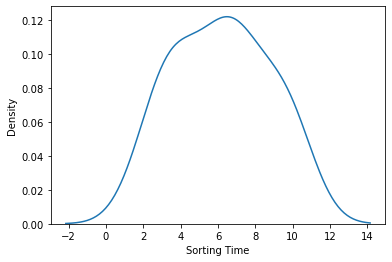

In [63]:
sns.distplot(delivery_data['Sorting Time'],hist=False)

In [64]:
sc=StandardScaler()
sc.fit(delivery_data[['Delivery Time','Sorting Time']])
df_sc=sc.transform(delivery_data[['Delivery Time','Sorting Time']])

In [65]:
df=pd.DataFrame(df_sc,columns=['Delivery_time_sc','Sorting_time_sc'])
df

,Delivery_time_sc,Sorting_time_sc
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625
5,-0.290949,-0.076781
6,0.446038,0.326320
7,-1.472148,-1.286086
8,0.223933,1.535625
9,0.395560,1.132523


In [66]:
df.describe()

,Delivery_time_sc,Sorting_time_sc
count,2.100000e+01,2.100000e+01
mean,-5.392512e-16,-7.137148e-17
std,1.024695e+00,1.024695e+00
min,-1.775019e+00,-1.689187e+00
25%,-6.644904e-01,-8.829842e-01
50%,2.097986e-01,-7.678123e-02
75%,5.974740e-01,7.294217e-01
max,2.465181e+00,1.535625e+00


#### Model Training

In [67]:
import statsmodels.formula.api as smf 
model_sc=smf.ols("Delivery_time_sc~Sorting_time_sc",data=df).fit()


#### Model Testing

In [68]:
model_sc.params

Intercept         -5.134781e-16
Sorting_time_sc    8.259973e-01
dtype: float64

#### Model Evaluation

In [69]:
model_sc.rsquared

0.6822714748417231

In [70]:
# Finding tvalues and pvalues
model_sc.tvalues , model_sc.pvalues

(Intercept         -3.970733e-15
 Sorting_time_sc    6.387447e+00
 dtype: float64,
 Intercept          1.000000
 Sorting_time_sc    0.000004
 dtype: float64)